# Generation of figure 1
Tim Tyree<br>
3.8.2022

In [1]:
from lib.my_initialization import *
from lib import *
# from lib.measure.unwrap_and_smooth_cu import *
# from lib.rapids_func import *
# .routines.unwrap_and_smooth_trajectories_cu import *

import itertools
import dask_cudf
# from lib.rapids_func import *
# get_DT_cu

#magic    
%autocall 1
%load_ext autoreload
%autoreload 2

import cupy as cp, cudf, numba.cuda as cuda
import rmm
# Switch to RMM allocator
cp.cuda.set_allocator(rmm.rmm_cupy_allocator)

Automatic calling is: Smart


# define module


In [2]:
from scipy.stats import normaltest
def bootstrap_mean(x,num_samples=1000):
    mean_values=np.zeros(num_samples)
    sizex=x.shape[0]
    for i in range(num_samples):
        randint_values=np.random.randint(low=0, high=sizex, size=sizex, dtype=int)
        x_bootstrap=x[randint_values]
        mean_values[i]=np.mean(x_bootstrap)
    return mean_values

def bootstrap_stdev_of_mean(x,num_samples=1000):
    mean_values=bootstrap_mean(x,num_samples=num_samples)
    sig=np.std(mean_values)
    return sig

def bootstrap_95CI_Delta_mean(x,num_samples=1000):
    '''returns Delta_mean,p'''
    mean_values=bootstrap_mean(x,num_samples=num_samples)
    sig=np.std(mean_values)
    _, p = normaltest(mean_values)
    Delta_mean=1.96*sig
    return Delta_mean,p

# Aggregate Trajectories and Perform Averaging

In [3]:
os.chdir('/home/timothytyree/Documents/GitHub/care/notebooks')
# # from lib import *
# from lib.my_initialization import *
# os.chdir('lib')
# import rapids_func
# from rapids_func import routine_postprocess_trajectory_folder

In [4]:
from lib.my_initialization import *
from lib import *
# from lib.measure.unwrap_and_smooth_cu import *
# from lib.rapids_func import *
# .routines.unwrap_and_smooth_trajectories_cu import *

import itertools
import dask_cudf
from lib.rapids_func import *
get_DT_cu

#magic    
%autocall 1
%load_ext autoreload
%autoreload 2

import cupy as cp, cudf, numba.cuda as cuda
import rmm
# Switch to RMM allocator
cp.cuda.set_allocator(rmm.rmm_cupy_allocator)

ModuleNotFoundError: No module named 'lib.rapids_func'

In [77]:
os.chdir(nb_dir)
!pwd

/home/timothytyree/Documents/GitHub/bgmc/python


In [80]:
##########################
# Perform Averaging
##########################
tavg1=0
tavg2=14#todo 0
#one token trajectory file for the fenton karma model and the luo-rudy model
input_fn_lst=[
# c='C0'
# # # # #token FK at DT=0.4
"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.2_traj_sr_400_mem_0.csv",
# c='C1'
# #tokenLR at DT=0.5
"/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/trajectories/ic002.11_traj_sr_600_mem_0.csv",   
]

# kwargs_full=dict(
#         max_dtmax_thresh = 0,      #ms
#         max_Rfinal_thresh = 0.2,   #cm
#         min_duration_thresh = 40,  #ms
#         npartitions=None,
#         width=200,
#         height=200,
#         ds=5,
#         use_drop_shorter_than=True,
#         drop_shorter_than=40, #ms
#         tmin=100., #ms
#         pid_col='particle',
#         t_col='t',
#         npartitions2=1,
#         printing=True)
min_duration_thresh=0
pid_col='particle'
kwargs_full=dict(
        max_dtmax_thresh = 0,      #ms
        max_Rfinal_thresh = 5.,   #cm
        min_duration_thresh = float(min_duration_thresh),  #ms
        npartitions=None,
        width=200,
        height=200,
        ds=5,
        use_drop_shorter_than=False,
        drop_shorter_than=0, #ms
        tmin=100., #ms
        pid_col=pid_col,
        t_col='t',
        npartitions2=1,
        printing=True)

save_dir_lst2_lst=[]
for input_fn in input_fn_lst:
    df = pd.read_csv(input_fn)
    DT = np.around(get_DT(df, pid_col=pid_col), 7)
    print(f"DT={DT} ms")
    retval = routine_postprocess_trajectory_folder(
        input_fn,
        DT,
        tavg1=tavg1,
        tavg2=tavg2,
        **kwargs_full)
    save_dir_lst, save_dir_lst2 = retval
    save_dir_lst2_lst.append(save_dir_lst2)

saving=True
if saving:
    #save data to cache
    #FK at 0.4ms
    save_folder='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results'
    data_dir_fk=f'{save_folder}/annihilation_data_fk_tavg1_{tavg1:.1f}_tavg2_{tavg2:.2f}_min_duration_thresh_{min_duration_thresh}.csv'
    df_fk=dask_cudf.read_csv(save_dir_lst2_lst[0]).compute()
    df_fk.to_csv(data_dir_fk,index=False)
    #LR at 0.5ms
    data_dir_lr=f'{save_folder}/annihilation_data_lr_tavg1_{tavg1:.1f}_tavg2_{tavg2:.2f}_min_duration_thresh_{min_duration_thresh}.csv'
    df_lr=dask_cudf.read_csv(save_dir_lst2_lst[1]).compute()
    df_lr.to_csv(data_dir_lr,index=False)
    print(f"saved to\ndata_dir_fk='{data_dir_fk}'\ndata_dir_lr='{data_dir_lr}'")

DT=0.4 ms
running return_moving_average_of_pbc_trajectories_and_save on 648 files...


ModuleNotFoundError: No module named 'rapids_func'

msr_dir_fk=/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00_msr.csv
msr_dir_lr=/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00_msr.csv


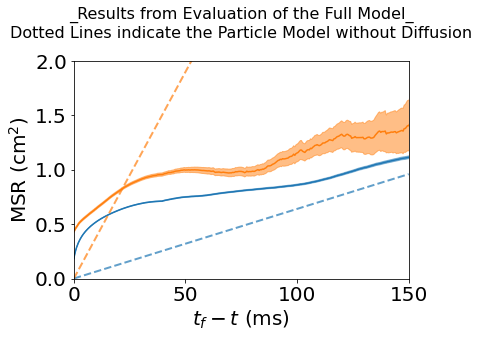

R_col=R_nosavgol, tavg1=0.0 ms, tavg2=14.0 ms


In [5]:
# ##########################
# # Compute MSR
# ##########################
# R_col='R_nosavgol'
# tavg1=0.
# tavg2=14.
# # R_col='R'
# #load cached data
# #FK at 0.4ms
# #LR at 0.5ms
# # data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_4.0_tavg2_14.00.csv'
# # data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_4.0_tavg2_14.00.csv'
# data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00.csv'
# data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00.csv'
# df_fk=pd.read_csv(data_dir_fk)
# df_lr=pd.read_csv(data_dir_lr)

# # # print(len(save_dir_lst2))
# # # print(save_dir_lst2[0])
# # print(df_fk.head(2))
# # print(df_lr.head(2))

# #TODO: dev alignment routine to shift R_col and tdeath s.t. at time t=0, R=0, via linear interpolation of the at least the first two data points

# minnumobs=8
# #fenton karma msr dataframe
# groups=df_fk.groupby('tdeath')
# tdeath_lst=[]
# avg_lst=[]
# stderror_lst=[]
# sqavg_lst=[]
# sqstderror_lst=[]
# count_lst=[]
# for n,g in groups:
#     ##DONE: print each tdeath value 
#     # print(n)
#     gr=g[R_col]
#     counts=gr.count()#.values
#     if (minnumobs<=counts).all():
#         #TODO: compute average and stderror of each group of tdeath
#         avg=gr.mean()#.values
#         stddev=gr.std()#.values
#         stderror=stddev/np.sqrt(counts)
        
#         #TODO: compute squared average
#         sq=gr**2
#         sqavg=sq.mean()#.values
#         sqstddev=sq.std()#.values
#         sqstderror=sqstddev/np.sqrt(counts)
#         #record
#         tdeath_lst.append(n)        
#         avg_lst.append(avg)
#         stderror_lst.append(stderror)
#         sqavg_lst.append(sqavg)
#         sqstderror_lst.append(sqstderror)
#         count_lst.append(counts)
        
# #collect each field into a pandas.DataFrame
# df_msr_fk=pd.DataFrame({
#     'tdeath':tdeath_lst,
#     'avg':avg_lst,
#     'stderror':stderror_lst,  
#     'sqavg':sqavg_lst,
#     'sqstderror':sqstderror_lst,  
#     'counts':count_lst
# })    
# #
# # #TODO: repeat with lr
# groups=df_lr.groupby('tdeath')
# tdeath_lst=[]
# avg_lst=[]
# stderror_lst=[]
# sqavg_lst=[]
# sqstderror_lst=[]
# count_lst=[]
# for n,g in groups:
#     ##DONE: print each tdeath value 
#     # print(n)
#     gr=g[R_col]
#     counts=gr.count()#.values
#     if (minnumobs<=counts).all():
#         #TODO: compute average and stderror of each group of tdeath
#         avg=gr.mean()#.values
#         stddev=gr.std()#.values
#         stderror=stddev/np.sqrt(counts)
        
#         #TODO: compute squared average
#         sq=gr**2
#         sqavg=sq.mean()#.values
#         sqstddev=sq.std()#.values
#         sqstderror=sqstddev/np.sqrt(counts)
#         #record
#         tdeath_lst.append(n)        
#         avg_lst.append(avg)
#         stderror_lst.append(stderror)
#         sqavg_lst.append(sqavg)
#         sqstderror_lst.append(sqstderror)
#         count_lst.append(counts)
        
# #collect each field into a pandas.DataFrame
# df_msr_lr=pd.DataFrame({
#     'tdeath':tdeath_lst,
#     'avg':avg_lst,
#     'stderror':stderror_lst,  
#     'sqavg':sqavg_lst,
#     'sqstderror':sqstderror_lst,  
#     'counts':count_lst
# })    
# # print(df_msr_lr.head())

# saving=True
# if saving:
#     #(optional): save as csv
#     msr_dir_fk=data_dir_fk.replace('.csv','_msr.csv')
#     df_msr_fk.to_csv(msr_dir_fk,index=False)
#     print(f'msr_dir_fk={msr_dir_fk}')
#     msr_dir_lr=data_dir_lr.replace('.csv','_msr.csv')
#     df_msr_lr.to_csv(msr_dir_lr,index=False)
#     print(f'msr_dir_lr={msr_dir_lr}')

# ##########################
# # Visualize MSR
# ##########################
# # #extract values to visualize
# # msr_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_4.0_tavg2_14.00_msr.csv'
# # msr_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_4.0_tavg2_14.00_msr.csv'
# # #DONT/TODO: worry about the slope for now?
# #TODO: verify that the x axis is in units of seconds and not milliseconds
# df_msr_fk.sort_values(by='tdeath',inplace=True)
# df_msr_lr.sort_values(by='tdeath',inplace=True)
# x_values_fk=df_msr_fk['tdeath'].values
# y_values_fk=df_msr_fk['sqavg'].values**.5
# yerr_values_fk=df_msr_fk['sqstderror'].values
# x_values_lr=df_msr_lr['tdeath'].values
# y_values_lr=df_msr_lr['sqavg'].values**.5
# yerr_values_lr=df_msr_lr['sqstderror'].values
# # print(f'R_col={R_col}, tavg1={tavg1} ms, tavg2={tavg2} ms')

# xmin=0#.1
# xmax=150
# #plot ^those resulting df_msr versus tdeath
# plt.plot(x_values_fk,y_values_fk,c='C0')
# plt.fill_between(x_values_fk,y_values_fk-yerr_values_fk,y_values_fk+yerr_values_fk,color='C0',alpha=0.5)
# plt.plot(x_values_lr,y_values_lr,c='C1')
# plt.fill_between(x_values_lr,y_values_lr-yerr_values_lr,y_values_lr+yerr_values_lr,color='C1',alpha=0.5)
# format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)',use_loglog=False)
# plt.xlim([xmin,xmax])
# xv=np.linspace(xmin,xmax,100)
# plt.plot(xv,xv*4*1.6*1e-3,'C0--',lw=2,alpha=0.7)
# plt.plot(xv,xv*4*9.5*1e-3,'C1--',lw=2,alpha=0.7)
# # plt.xlim([0,1])
# plt.ylim([0,2])
# # plt.ylim([0.5,2])
# fontsize=16
# # plt.legend(fontsize=fontsize-4,loc='upper right')
# plt.title('_Results from Evaluation of the Full Model_\nDotted Lines indicate the Particle Model without Diffusion\n',fontsize=fontsize)
# plt.show()
# print(f'R_col={R_col}, tavg1={tavg1} ms, tavg2={tavg2} ms')

# TODO(later, copying from previous ipynb... in 'fast estimation of particle properties.ipynb'?): correct the range between particles for the annihilation time $t_f$ using linear extrapolation of the smoothed range between particles in the last milliseconds leading up to annihilation.

# TODO: plot the kdeplot of the mean squared distances versus the minimum lifetimes for the luo-rudy model

In [5]:
#reset matplotlib
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

In [6]:
# data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00.csv'
# df=pd.read_csv(data_dir_fk)
data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00.csv'
df=pd.read_csv(data_dir_lr)
df.head()

,event_id_int,pid_self,pid_other,index,t,R,index_pairs,index_self,index_other,x_self,y_self,x_other,y_other,R_nosavgol,tdeath
0,1014126000,68,74,0,186.0,1.275421,0,1443,1446,134.080952,25.349498,104.738229,66.108926,1.255569,41.0
1,1014126000,68,74,1,186.5,1.266636,0,1456,1455,133.998502,25.012627,104.590506,66.137120,1.263936,40.5
2,1014126000,68,74,2,187.0,1.259860,0,1462,1467,134.039986,25.133593,104.564511,66.135175,1.262422,40.0
3,1014126000,68,74,3,187.5,1.254901,0,1471,1472,134.080449,25.225738,104.194274,66.067583,1.265217,39.5
4,1014126000,68,74,4,188.0,1.251562,0,1481,1485,134.274329,25.570294,103.919121,66.037570,1.264674,39.0


In [7]:
R_col='R'
R_col='R_nosavgol'
t_col='t'

minimum_lifetime_lst=[]
RBarSquared_lst=[]
groups=df.groupby(by=['event_id_int','pid_self','pid_other'])
for (event_id_int,pid_self,pid_other),g in groups:
    #compute observables of interest
    minimum_lifetime=g[t_col].max()-g[t_col].min() # ms max_min_time
    RBarSquared=(g[R_col]**2).mean()
    #record
    minimum_lifetime_lst.append(minimum_lifetime)
    RBarSquared_lst.append(RBarSquared)
x_values=np.array(minimum_lifetime_lst)
y_values=np.array(RBarSquared_lst)

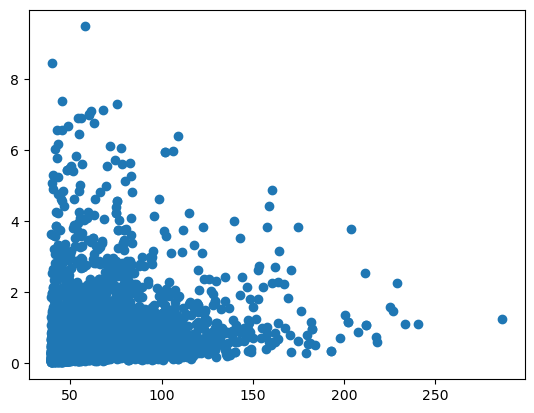

In [8]:
plt.scatter(x_values,y_values)

In [9]:
np.random.seed(42)
#bootstrap average values
num_samples=x_values.shape[0]
xBar=np.mean(x_values)
yBar=np.mean(y_values)
Delta_xBar=np.mean(x_values)
Delta_xBar,p_normal_xBar=bootstrap_95CI_Delta_mean(x_values,num_samples=1000)
Delta_yBar,p_normal_yBar=bootstrap_95CI_Delta_mean(y_values,num_samples=1000)
print(f"bootstrapped average for the full model (num_samples={num_samples}):")
# print(f"xBar: {xBar:.4f} +/-  {Delta_xBar:.4f} (p={p_normal_xBar:.4f})")
# print(f"yBar: {yBar:.4f} +/-  {Delta_yBar:.4f} (p={p_normal_yBar:.4f})")
print(f"mean minimum lifetime: {xBar:.4f} +/-  {Delta_xBar:.4f} ms (p={p_normal_xBar:.4f})")
print(f"mean squared distance: {yBar:.4f} +/-  {Delta_yBar:.4f} cm^2 (p={p_normal_yBar:.4f})")

bootstrapped average for the full model (num_samples=5181):
mean minimum lifetime: 61.9093 +/-  0.6637 ms (p=0.2573)
mean squared distance: 0.7049 +/-  0.0236 cm^2 (p=0.7381)


In [10]:
#TODO: plot a kde for these xy values
df_xy=pd.DataFrame({'x':x_values,'y':y_values,})

In [11]:
kwargs_plot=dict(data=df_xy, x="x", y="y",xlim=[0,150],ylim=[0,2])

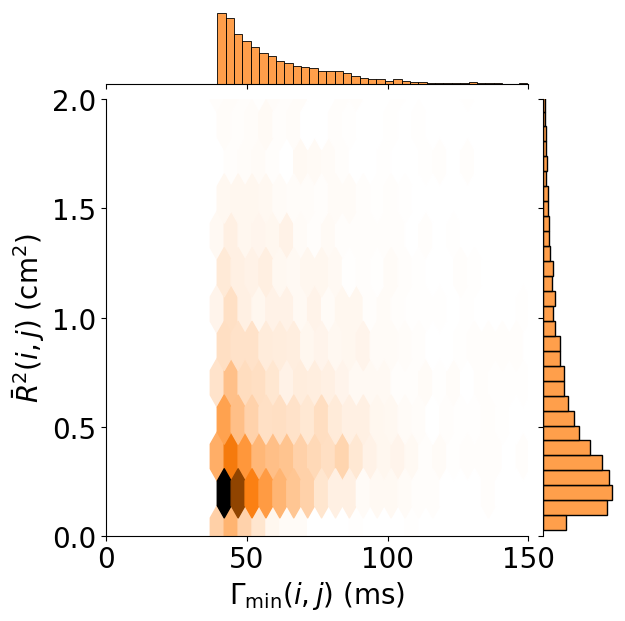

In [21]:
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 
figsize=(3,3)
# fig,ax=plt.subplots(figsize=figsize)
sns_fig=sns.jointplot(kind="hex",color='C1',**kwargs_plot)
ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel=r'$\Gamma_{\min }(i,j)$ (ms)',ylabel=r'$\bar R ^2(i,j)$ (cm$^2$)')
# ax.set_yscale('log')
plt.show()

In [23]:
plt.scatter?

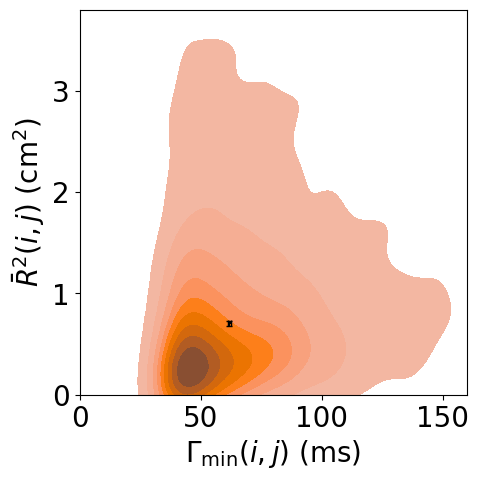

In [30]:
#TODO: plot a kde for these xy values
figsize=(5,5)
xlim=[0,160]
ylim=[0,3.8]
color='C1'

kwargs_kdeplot=dict(data=df_xy, x="x", y="y",color=color)
# fig=plt.figure(figsize=figsize)
fig,ax=plt.subplots(figsize=figsize)


sns_fig=sns.kdeplot(ax=ax,fill=True,**kwargs_kdeplot)

ax.errorbar(x=[xBar],y=[yBar],xerr=[Delta_xBar],yerr=[Delta_yBar],c='k',capsize=2)

# matplotlib.pyplot.errorbar
# sns_fig.set_figure(fig)
# ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel=r'$\Gamma_{\min }(i,j)$ (ms)',ylabel=r'$\bar R ^2(i,j)$ (cm$^2$)')
# sns_fig.set_xscale('log')
sns_fig.set_xlim(xlim)
sns_fig.set_ylim(ylim)
plt.show()

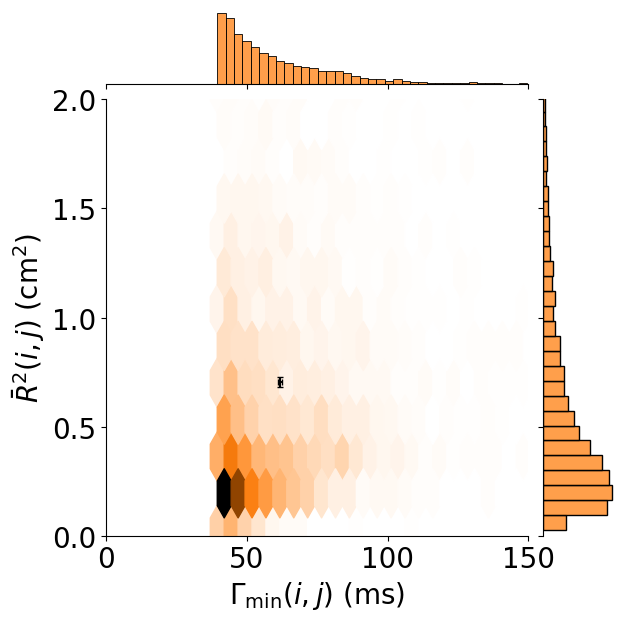

In [37]:
# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 
figsize=(3,3)
# fig,ax=plt.subplots(figsize=figsize)
sns_fig=sns.jointplot(kind="hex",color='C1',**kwargs_plot)
ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel=r'$\Gamma_{\min }(i,j)$ (ms)',ylabel=r'$\bar R ^2(i,j)$ (cm$^2$)')
ax.errorbar(x=[xBar],y=[yBar],xerr=[Delta_xBar],yerr=[Delta_yBar],c='k',capsize=2)
# sns_fig.set_xlim(xlim)
# sns_fig.set_ylim(ylim)
plt.show()

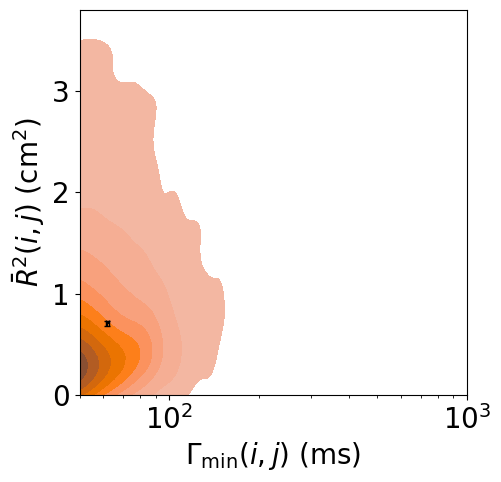

In [34]:
#TODO: plot a kde for these xy values
figsize=(5,5)
xlim=[50,1e3]
ylim=[0,3.8]
color='C1'

kwargs_kdeplot=dict(data=df_xy, x="x", y="y",color=color)
# fig=plt.figure(figsize=figsize)
fig,ax=plt.subplots(figsize=figsize)


sns_fig=sns.kdeplot(ax=ax,fill=True,**kwargs_kdeplot)

ax.errorbar(x=[xBar],y=[yBar],xerr=[Delta_xBar],yerr=[Delta_yBar],c='k',capsize=2)

# matplotlib.pyplot.errorbar
# sns_fig.set_figure(fig)
# ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel=r'$\Gamma_{\min }(i,j)$ (ms)',ylabel=r'$\bar R ^2(i,j)$ (cm$^2$)')
sns_fig.set_xscale('log')
sns_fig.set_xlim(xlim)
sns_fig.set_ylim(ylim)
plt.show()

In [ ]:
#repeating for FK model had a long runtime

bootstrapped average for the full model (num_samples=21653):
mean minimum lifetime: 159.8552 +/-  2.2498 ms (p=0.1484)
mean squared distance: 0.6570 +/-  0.0097 cm^2 (p=0.1854)


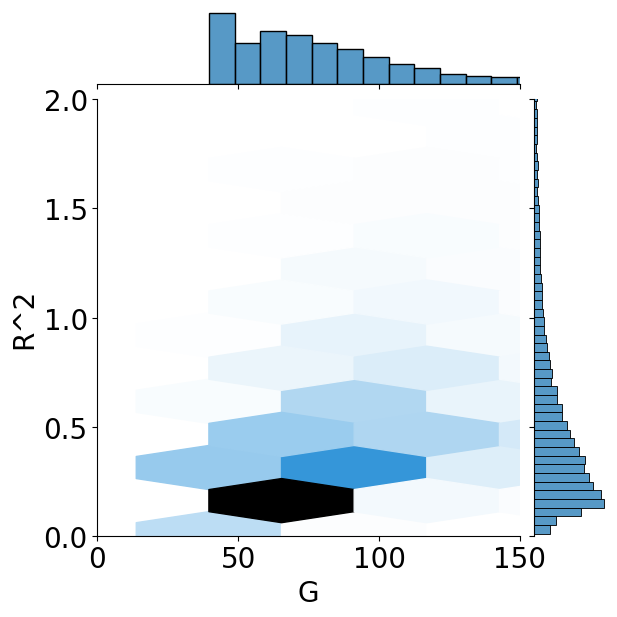

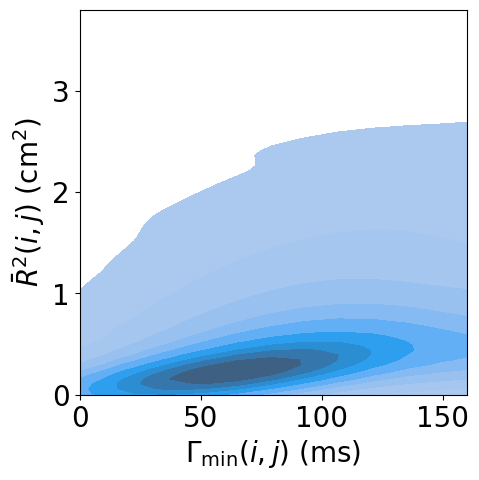

In [38]:
data_dir_fk='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_fk_tavg1_0.0_tavg2_14.00.csv'
df=pd.read_csv(data_dir_fk)
# data_dir_lr='/home/timothytyree/Documents/GitHub/bgmc/python/data/full_results/annihilation_data_lr_tavg1_0.0_tavg2_14.00.csv'
# df=pd.read_csv(data_dir_lr)

R_col='R'
R_col='R_nosavgol'
t_col='t'

minimum_lifetime_lst=[]
RBarSquared_lst=[]
groups=df.groupby(by=['event_id_int','pid_self','pid_other'])
for (event_id_int,pid_self,pid_other),g in groups:
    #compute observables of interest
    minimum_lifetime=g[t_col].max()-g[t_col].min() # ms max_min_time
    RBarSquared=(g[R_col]**2).mean()
    #record
    minimum_lifetime_lst.append(minimum_lifetime)
    RBarSquared_lst.append(RBarSquared)
x_values=np.array(minimum_lifetime_lst)
y_values=np.array(RBarSquared_lst)

# plt.scatter(x_values,y_values)

np.random.seed(42)
#bootstrap average values
num_samples=x_values.shape[0]
xBar=np.mean(x_values)
yBar=np.mean(y_values)
Delta_xBar=np.mean(x_values)
Delta_xBar,p_normal_xBar=bootstrap_95CI_Delta_mean(x_values,num_samples=1000)
Delta_yBar,p_normal_yBar=bootstrap_95CI_Delta_mean(y_values,num_samples=1000)
print(f"bootstrapped average for the full model (num_samples={num_samples}):")
# print(f"xBar: {xBar:.4f} +/-  {Delta_xBar:.4f} (p={p_normal_xBar:.4f})")
# print(f"yBar: {yBar:.4f} +/-  {Delta_yBar:.4f} (p={p_normal_yBar:.4f})")
print(f"mean minimum lifetime: {xBar:.4f} +/-  {Delta_xBar:.4f} ms (p={p_normal_xBar:.4f})")
print(f"mean squared distance: {yBar:.4f} +/-  {Delta_yBar:.4f} cm^2 (p={p_normal_yBar:.4f})")

#TODO: plot a kde for these xy values
df_xy=pd.DataFrame({'x':x_values,'y':y_values,})

kwargs_plot=dict(data=df_xy, x="x", y="y",xlim=[0,150],ylim=[0,2])

# "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" 

figsize=(3,3)
# fig,ax=plt.subplots(figsize=figsize)
sns_fig=sns.jointplot(kind="hex",**kwargs_plot)
ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel='G',ylabel='R^2')

#TODO: plot a kde for these xy values
figsize=(5,5)
xlim=[0,160]
ylim=[0,3.8]
kwargs_kdeplot=dict(data=df_xy, x="x", y="y",color="C0")
# fig=plt.figure(figsize=figsize)
fig,ax=plt.subplots(figsize=figsize)


sns_fig=sns.kdeplot(ax=ax,fill=True,**kwargs_kdeplot)
# sns_fig.set_figure(fig)
# ax=sns_fig.figure.gca()
format_plot(ax=ax,xlabel=r'$\Gamma_{\min }(i,j)$ (ms)',ylabel=r'$\bar R ^2(i,j)$ (cm$^2$)')
# sns_fig.set_xscale('log')
sns_fig.set_xlim(xlim)
sns_fig.set_ylim(ylim)
plt.show()